### Extraire les names des labels

In [1]:
import pandas as pd
def labelsToName(df2):
    df2["label_names"]=df2["labels"].apply(\
        lambda ligne: #fct anonyme \
                    "no_labels" if len(ligne) == 0 # le if \
                     else ",".join(map( #on parcourt la list de dico \
                              lambda dico: dico["name"] #on prend le name dans le dico \
                             ,ligne))\
                  )

### Importer les données de plusieurs pages

In [4]:
 def importerEtTraiterLesIssusLabels(maxi=10,page=30):
        a_concat=[]
        giveMePage = lambda i: pd.read_json("https://api.github.com/repos/Microsoft/vscode/issues?per_page=%d&page=%d" % (page,i))
        dfA = giveMePage(1)
        i=0
        while  dfA.size > 0 and i<maxi:
            labelsToName(dfA)
            a_concat.append(dfA)
            dfA = giveMePage(1)
            i+=1
    #print(len(a_concat))
        pdd=pd.concat(a_concat,ignore_index=True)
       # pdd["isBug"]=d["label_names"].str.contains("bug",regex=True)
        #pdd["isFR"]=d["label_names"].str.contains("feature\-request",regex=True)
        #pdd["isOther"] = ~d["label_names"].str.contains("bug|feature\-request")
        return pdd

In [5]:
 d=importerEtTraiterLesIssusLabels(maxi=10,page=30)

In [6]:
d

,assignee,assignees,author_association,body,closed_at,comments,comments_url,created_at,events_url,html_url,...,node_id,number,pull_request,repository_url,state,title,updated_at,url,user,label_names
0,None,[],NONE,Issue Type: <b>Bug</b>\r\n\r\nSome menu items ...,NaT,1,https://api.github.com/repos/Microsoft/vscode/...,2018-09-02 13:03:10,https://api.github.com/repos/Microsoft/vscode/...,https://github.com/Microsoft/vscode/issues/57773,...,MDU6SXNzdWUzNTYyODA4NzA=,57773,NaN,https://api.github.com/repos/Microsoft/vscode,open,Blurry text on menus and layout on MacOS,2018-09-02 13:03:15,https://api.github.com/repos/Microsoft/vscode/...,"{'login': 'Ant-V', 'id': 7198995, 'node_id': '...",no_labels
1,"{'login': 'mjbvz', 'id': 12821956, 'node_id': ...","[{'login': 'mjbvz', 'id': 12821956, 'node_id':...",NONE,VSCode Version: 1.26.1\r\nOS Version: MacOS\r\...,NaT,2,https://api.github.com/repos/Microsoft/vscode/...,2018-09-02 11:56:57,https://api.github.com/repos/Microsoft/vscode/...,https://github.com/Microsoft/vscode/issues/57772,...,MDU6SXNzdWUzNTYyNzYyOTY=,57772,NaN,https://api.github.com/repos/Microsoft/vscode,open,"The program runs fine, but some of the code on...",2018-09-02 12:11:31,https://api.github.com/repos/Microsoft/vscode/...,"{'login': 'wanghaooo', 'id': 26863173, 'node_i...",javascript
2,None,[],NONE,<!-- Please search existing issues to avoid cr...,NaT,1,https://api.github.com/repos/Microsoft/vscode/...,2018-09-02 10:08:10,https://api.github.com/repos/Microsoft/vscode/...,https://github.com/Microsoft/vscode/issues/57771,...,MDU6SXNzdWUzNTYyNjk4Njc=,57771,NaN,https://api.github.com/repos/Microsoft/vscode,open,C++ class name not highlighted,2018-09-02 10:08:15,https://api.github.com/repos/Microsoft/vscode/...,"{'login': 'obhi-d', 'id': 7620636, 'node_id': ...",no_labels
3,"{'login': 'sandy081', 'id': 10746682, 'node_id...","[{'login': 'sandy081', 'id': 10746682, 'node_i...",MEMBER,- OS Version: macOS\r\n\r\nSteps to Reproduce:...,NaT,0,https://api.github.com/repos/Microsoft/vscode/...,2018-09-02 08:56:16,https://api.github.com/repos/Microsoft/vscode/...,https://github.com/Microsoft/vscode/issues/57770,...,MDU6SXNzdWUzNTYyNjQ5Nzg=,57770,NaN,https://api.github.com/repos/Microsoft/vscode,open,Extensions editor: editor not focused when cli...,2018-09-02 08:56:16,https://api.github.com/repos/Microsoft/vscode/...,"{'login': 'bpasero', 'id': 900690, 'node_id': ...",bug
4,"{'login': 'weinand', 'id': 1898161, 'node_id':...","[{'login': 'weinand', 'id': 1898161, 'node_id'...",NONE,<!-- Please search existing issues to avoid cr...,NaT,2,https://api.github.com/repos/Microsoft/vscode/...,2018-09-02 07:45:34,https://api.github.com/repos/Microsoft/vscode/...,https://github.com/Microsoft/vscode/issues/57769,...,MDU6SXNzdWUzNTYyNjA5MzU=,57769,NaN,https://api.github.com/repos/Microsoft/vscode,open,Paste Broken only on python debug interactive ...,2018-09-02 11:02:02,https://api.github.com/repos/Microsoft/vscode/...,"{'login': 'AviP1234', 'id': 31180090, 'node_id...","debug,needs more info"
5,"{'login': 'mjbvz', 'id': 12821956, 'node_id': ...","[{'login': 'mjbvz', 'id': 12821956, 'node_id':...",NONE,Issue Type: <b>Bug</b>\r\n\r\nWhen you make a ...,NaT,1,https://api.github.com/repos/Microsoft/vscode/...,2018-09-02 07:37:48,https://api.github.com/repos/Microsoft/vscode/...,https://github.com/Microsoft/vscode/issues/57768,...,MDU6SXNzdWUzNTYyNjA1MzI=,57768,NaN,https://api.github.com/repos/Microsoft/vscode,open,Javascript syntax string highlighting,2018-09-02 07:38:09,https://api.github.com/repos/Microsoft/vscode/...,"{'login': 'zicsus', 'id': 31795543, 'node_id':...",javascript
6,None,[],NONE,Pylint does not work in vs code if one of the ...,NaT,0,https://api.github.com/repos/Microsoft/vscode/...,2018-09-02 06:49:58,https://api.github.com/repos/Microsoft/vscode/...,https://github.com/Microsoft/vscode/issues/57767,...,MDU6SXNzdWUzNTYyNTc4NTI=,57767,NaN,https://api.github.com/repos/Microsoft/vscode,open,Weird Pylint bug,2018-09-02 06:49:58,https

In [7]:
d["body"][3]

'- OS Version: macOS\r\n\r\nSteps to Reproduce:\r\n\r\n1. open 2 editors side by side\r\n2. a normal text editor on the left that has focus\r\n3. an extension editor on the right \r\n4. click into the contents of the extension description\r\n5. => the editor correctly shows as focused\r\n6. click back into the left editor\r\n7. click into the header area of the extension (e.g. "Changelog")\r\n8. => 🐛 the editor does not show as focused\r\n\r\nThe editor part is installing a focus tracker on the container and somehow it seems that the top area of the extension editor is not bubbling out the focus.\r\n\r\n'

### Extraire quelques variables interessantes

In [8]:
col = ['label_names','body']
dcol = d[col]
dcol

,label_names,body
0,no_labels,Issue Type: <b>Bug</b>\r\n\r\nSome menu items ...
1,javascript,VSCode Version: 1.26.1\r\nOS Version: MacOS\r\...
2,no_labels,<!-- Please search existing issues to avoid cr...
3,bug,- OS Version: macOS\r\n\r\nSteps to Reproduce:...
4,"debug,needs more info",<!-- Please search existing issues to avoid cr...
5,javascript,Issue Type: <b>Bug</b>\r\n\r\nWhen you make a ...
6,no_labels,Pylint does not work in vs code if one of the ...
7,install-update,"- VSCode Version: 1.26.1, 493869ee8e8a846b0855..."
8,"editor,editor-contrib","Issue Type: <b>Bug</b>\r\n\r\nBy default, ther..."
9,no_labels,The debugger for Java suddenly can't run.\r\nB...


### Encoder la variable label_names comme un entier

In [9]:
from io import StringIO
col = ['label_names', 'body']
d = d[col]
d.columns = ['label_names', 'body']
d['category_id'] = d['label_names'].factorize()[0]
category_id_d = d[['label_names', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_d.values)
id_to_category = dict(category_id_d[['category_id', 'label_names']].values)
d.head()

c:\users\thouderth\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,label_names,body,category_id
0,no_labels,Issue Type: <b>Bug</b>\r\n\r\nSome menu items ...,0
1,javascript,VSCode Version: 1.26.1\r\nOS Version: MacOS\r\...,1
2,no_labels,<!-- Please search existing issues to avoid cr...,0
3,bug,- OS Version: macOS\r\n\r\nSteps to Reproduce:...,2
4,"debug,needs more info",<!-- Please search existing issues to avoid cr...,3


### Histogramme de label_names

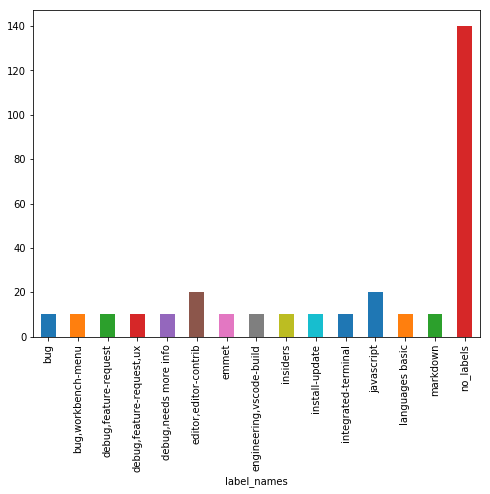

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
d.groupby('label_names').body.count().plot.bar(ylim=0)
plt.show()

### Représentation du texte avec Sklearn
#### Calculer TF-IDF

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(d.body).toarray()
labels = d.category_id
features.shape

(300, 3242)

#### Trouver les termes qui sont corrélés avec chaqu'un des labels

In [13]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for label_names, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(label_names))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'bug':
  . Most correlated unigrams:
. area
. focused
  . Most correlated bigrams:
. extension editor
. area extension
# 'bug,workbench-menu':
  . Most correlated unigrams:
. 2193314
. ade8
  . Most correlated bigrams:
. com 2193314
. ade8 11e8
# 'debug,feature-request':
  . Most correlated unigrams:
. workspacefolder
. attach
  . Most correlated bigrams:
. trigger launch
. debug process
# 'debug,feature-request,ux':
  . Most correlated unigrams:
. active
. root
  . Most correlated bigrams:
. active workspace
. workspace root
# 'debug,needs more info':
  . Most correlated unigrams:
. try
. paste
  . Most correlated bigrams:
. paste text
. version microsoft
# 'editor,editor-contrib':
  . Most correlated unigrams:
. crlf
. comment
  . Most correlated bigrams:
. comment line
. indented code
# 'emmet':
  . Most correlated unigrams:
. emmet
. laravel
  . Most correlated bigrams:
. emmet abbreviation
. 12 php
# 'engineering,vscode-build':
  . Most correlated unigrams:
. br
. code
  . Most 

### Multi class classifier: bug, feature-request and other

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(d['body'], d['label_names'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

### prédiction

In [15]:
print(clf.predict(count_vect.transform(["Issue Type: <b>Bug</b>\r\n\r\nSteps to reproduce:\r\n0) Make sure you are editing a .blade.php file\r\n1) Ctrl+Shift+P\r\n2) Emmet: Wrap with Abbreviation\r\n\r\nExpected:\r\nShould show a dialog for entering Emmet abbreviation and execute the command.\r\n\r\nCurrent results:\r\nThe dialog for entering the actual Emmet abbreviation never appears.\r\n\r\nNotes:\r\nReproduced on two different machines with different configs.\r\n\r\nVS Code version: Code 1.24.1 (24f62626b222e9a8313213fb64b10d741a326288, 2018-06-13T17:51:32.889Z)\r\nOS version: Windows_NT x64 10.0.15063\r\n\r\n<details>\r\n<summary>System Info</summary>\r\n\r\n|Item|Value|\r\n|---|---|\r\n|CPUs|Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz (8 x 3408)|\r\n|GPU Status|2d_canvas: enabled<br>flash_3d: enabled<br>flash_stage3d: enabled<br>flash_stage3d_baseline: enabled<br>gpu_compositing: enabled<br>multiple_raster_threads: enabled_on<br>native_gpu_memory_buffers: disabled_software<br>rasterization: disabled_software<br>video_decode: enabled<br>video_encode: enabled<br>vpx_decode: enabled<br>webgl: enabled<br>webgl2: enabled|\r\n|Memory (System)|15.95GB (7.86GB free)|\r\n|Process Argv|C:\\Program Files\\Microsoft VS Code\\Code.exe|\r\n|Screen Reader|no|\r\n|VM|0%|\r\n\r\n</details><details><summary>Extensions (17)</summary>\r\n\r\nExtension|Author (truncated)|Version\r\n---|---|---\r\nbracket-pair-colorizer|Coe|1.0.59\r\nvscode-eslint|dba|1.4.12\r\ngitlens|eam|8.4.1\r\nEditorConfig|Edi|0.12.4\r\nphp-debug|fel|1.12.4\r\nphp-intellisense|fel|2.3.4\r\nmysql-syntax|jak|1.3.1\r\nvue|jcb|0.1.5\r\ndotenv|mik|1.0.1\r\nvsliveshare|ms-|0.3.577\r\ndebugger-for-chrome|msj|4.8.2\r\nvetur|oct|0.12.6\r\nlaravel-blade|one|1.18.0\r\nlaravel-extension-pack|one|0.3.2\r\nlaravel5-snippets|one|1.5.0\r\nvscode-icons|rob|7.25.0\r\nlaravel-artisan|rya|0.0.21\r\n\r\n\r\n</details>\r\n<!-- generated by issue reporter -->"])))

['emmet']


In [17]:
d[d['body'] == "- Do a text search that returns no results\r\n- See Open Settings link\r\n- It used to search `.exclude` in JSON, it should do that in the settings UI "]

,label_names,body,category_id


In [18]:
print(clf.predict(count_vect.transform(["'- Do a text search that returns no results\r\n- See Open Settings link\r\n- It used to search `.exclude` in JSON, it should do that in the settings UI'"])))

['no_labels']


In [20]:
d[d['body'] == "- Do a text search that returns no results\r\n- See Open Settings link\r\n- It used to search `.exclude` in JSON, it should do that in the settings UI"]

,label_names,body,category_id


## Expérimenter avec plusieurs modeles de machine Learning

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_d = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_d = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

### Evaluer leur accuracie

In [22]:
cv_d.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 1.000000
LogisticRegression        0.966667
MultinomialNB             0.966667
RandomForestClassifier    0.600000
Name: accuracy, dtype: float64